PHYS 381: Computational Physics I

Jared Crebo 30085839

Final Take-Home Exam

Kernel: Python 3.10.11 | IDE: Visual Studio Code

4 Finite difference method

The temperature (in degree Celsius) on the left extreme of the bar (x=0) is: 18.5

The temperature (in degree Celsius) on the right extreme of the bar (x=L) is: 108.5

The total length of the metallic bar (in meters) is: 10

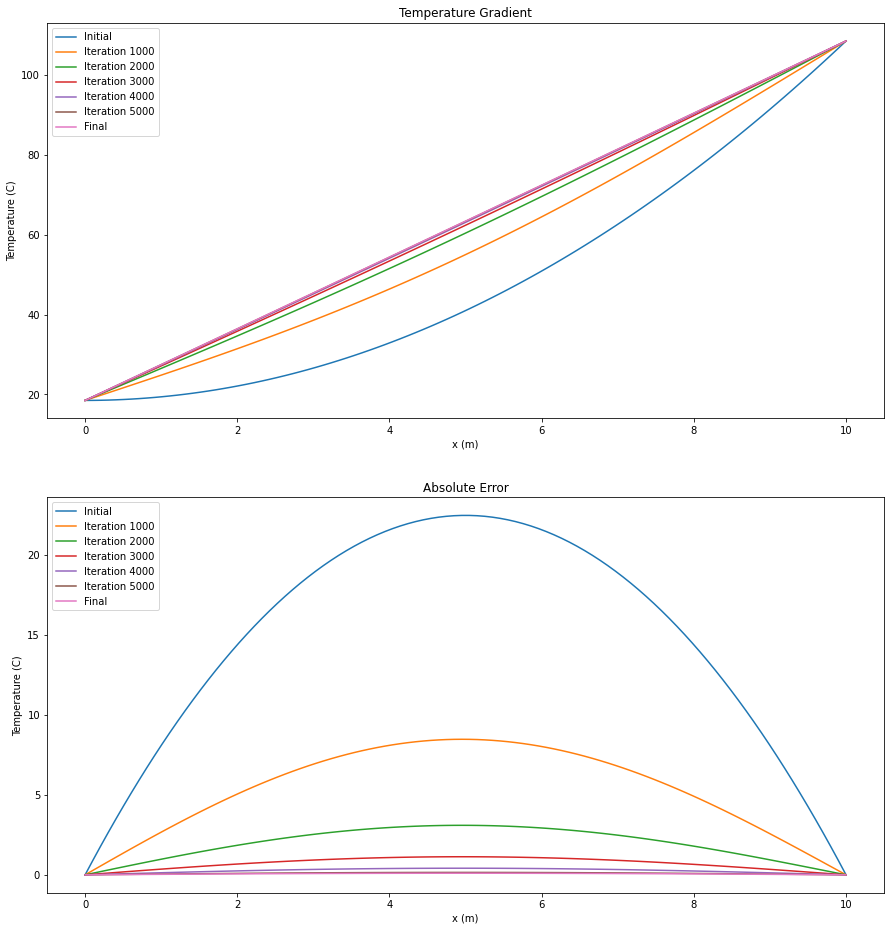

In [25]:
import numpy as np
import matplotlib.pyplot as plt

Tl = 18.5 # temperature of left side of bar (x = 0) in Celsius
Tr = 108.5 # temperature of right side of bar (x = L) in Celsius
L = 10 # length of bar in meters
N = 100 # Number of grid points
x = np.linspace(0, L, N) # x coordinates
T = (Tr - Tl)/L**2 * x**2 + Tl # quadratic initial guess
T_analytical = (Tr - Tl)/L * x + Tl # analytical solution for T"=0
error = np.abs(T - T_analytical) # absolute error
tolerance = 0.1 # specify converging tolerance (Celsius)

# Plot intermediate stages of converging solution on the same plot
fig, ax = plt.subplots(2,1,figsize = [15,16])
ax[0].plot(x,T, label = 'Initial') # Plot the initial guess
ax[1].plot(x,error, label = 'Initial') # Plot the initial error
converged = False
j = 0
while not converged: # Iterate until convergence criteria met
    j += 1
    for i in range(1,N-1): 
        T[i] = (T[i+1] + T[i-1]) / 2 # Solve for the temperature at each grid point
    error = np.abs(T - T_analytical) # Compute the absolute error of the new iteration
    if j % 1000 == 0: # Specify a certain iteration interval to plot for comparison
        ax[0].plot(x, T, label = f'Iteration {j}')
        ax[1].plot(x, error, label = f'Iteration {j}')
    if max(error) < tolerance: # Check convergence criteria
        converged = True # End loop
ax[0].plot(x,T, label = 'Final') # Plot the converged solution
ax[1].plot(x,error, label = 'Final') # Plot the error of the converged solution
ax[0].set_xlabel("x (m)")
ax[0].set_ylabel("Temperature (C)")
ax[0].set_title("Temperature Gradient")
ax[0].legend(loc='upper left')
ax[1].set_xlabel("x (m)")
ax[1].set_ylabel("Temperature (C)")
ax[1].set_title("Absolute Error")
ax[1].legend(loc='upper left')

The finite difference method is used to solve for the temperature gradient of a one-dimensional system with temperatures set on its boundaries. The temperature gradient across one dimension is governed by $\frac{d^{2}T}{dx^{2}} = 0$. Therefore, the central differencing formula for the second derivative was used: $\frac{T_{i+1} - 2T_{i} + T_{i-1}}{dx^{2}} = 0$ which is implemented as $T_{i} = \frac{T_{i-1}+T_{i+1}}{2}$ for each grid point along the x-axis from 0 to L. 

The temperature and absolute error as a function of location are plotted at the initial guess, every 1000th iteration, and at the converged solution. A quadratic function was used as an initial guess to show how the solution develops with each iteration, but a linear function can be used too. The analytical solution is a linear relationship, so this would not show the change over time as well. The figure shows the development of the solution over time as the quadratic relationship tends towards a linear relationship. The error is highest at the midpoint and increases in accuracy towards the ends of the bar because they are constrained by the boundary conditions. The converging tolerance is set to be $max(\xi(x)) = 0.1 C$, meaning the maximum error along the length of the bar must be less than 0.1 degrees Celsius for the convergence criteria to be met. 

Text(0.5, 1.0, 'Absolute Error')

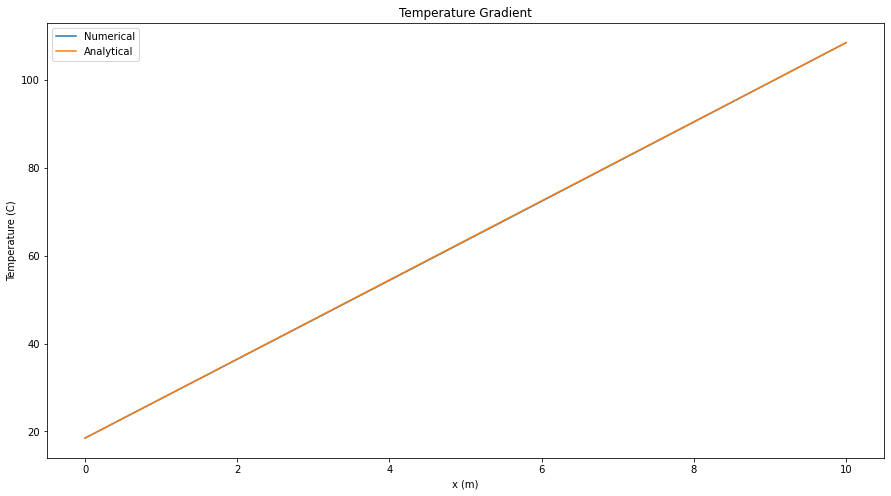

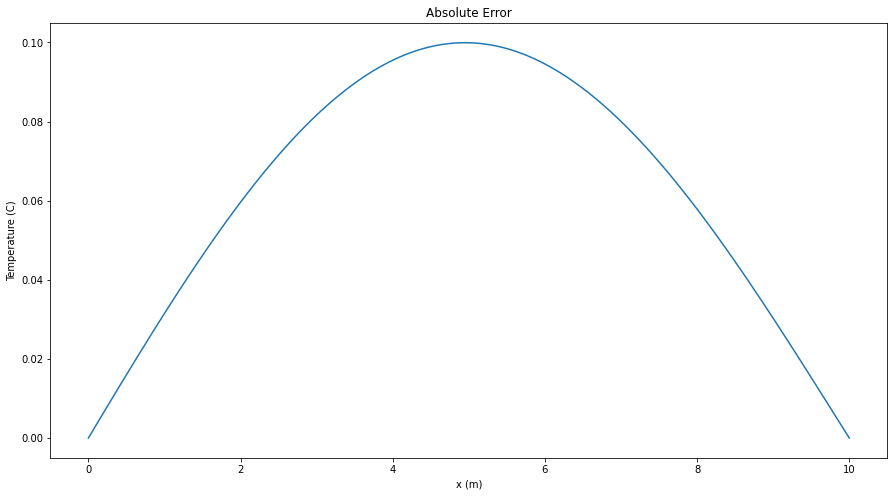

In [26]:
fig, ax = plt.subplots(figsize=[15,8])
ax.plot(x,T, label = 'Numerical') # Plot the converged solution
ax.plot(x,T_analytical, label = 'Analytical') # Plot the analytical solution
ax.set_xlabel("x (m)")
ax.set_ylabel("Temperature (C)")
ax.set_title("Temperature Gradient")
ax.legend()

fig, ax = plt.subplots(figsize=[15,8])
ax.plot(x,error, ) # Plot the absolute error
ax.set_xlabel("x (m)")
ax.set_ylabel("Temperature (C)")
ax.set_title("Absolute Error")

The top figure shows that the converged numerical solution plotted next to the analytical solution have good agreement in their results. The lower figure shows the absolute error of the converged numerical solution, where the maximum absolute error is the specified converging tolerance of 0.1 degrees Celsius. 